In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

# Reading in Population by County - 2020

In [2]:
county_pop = pd.read_csv('../data/pop_county.csv')
county_pop.head()

,CTYNAME,pop2020,GrowthRate
0,"Shelby, County",935346,0.7430
1,"Davidson, County",699749,11.4688
2,"Knox, County",474003,9.4829
3,"Hamilton, County",370594,9.8965
4,"Rutherford, County",341316,29.4325


In [3]:
county_pop = county_pop[['CTYNAME', 'pop2020']]
county_pop.head()

,CTYNAME,pop2020
0,"Shelby, County",935346
1,"Davidson, County",699749
2,"Knox, County",474003
3,"Hamilton, County",370594
4,"Rutherford, County",341316


In [4]:
county_pop.columns = ['county', 'population']
county_pop.head()

,county,population
0,"Shelby, County",935346
1,"Davidson, County",699749
2,"Knox, County",474003
3,"Hamilton, County",370594
4,"Rutherford, County",341316


In [5]:
county_pop['county'] = county_pop['county'].str.split(',').apply(lambda x: str(x[0]))
county_pop.head()

,county,population
0,Shelby,935346
1,Davidson,699749
2,Knox,474003
3,Hamilton,370594
4,Rutherford,341316


In [6]:
county_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      95 non-null     object
 1   population  95 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [7]:
county_pop.shape

(95, 2)

# Reading in Income Per Capita by County - 2016

In [8]:
ipc_county = pd.read_csv('../data/income_pc_county.csv')
ipc_county.head()

,Year,County,Value,LastReportedDate
0,2011,Anderson,35932.0,10/23/2018
1,2011,Bedford,29258.0,10/23/2018
2,2011,Benton,30373.0,10/23/2018
3,2011,Bledsoe,20002.0,10/23/2018
4,2011,Blount,33636.0,10/23/2018


In [9]:
ipc_county = ipc_county [['Year', 'County', 'Value']]
ipc_county.head()

,Year,County,Value
0,2011,Anderson,35932.0
1,2011,Bedford,29258.0
2,2011,Benton,30373.0
3,2011,Bledsoe,20002.0
4,2011,Blount,33636.0


In [10]:
ipc_county.columns = ['year', 'county', 'income']
ipc_county.head()

,year,county,income
0,2011,Anderson,35932.0
1,2011,Bedford,29258.0
2,2011,Benton,30373.0
3,2011,Bledsoe,20002.0
4,2011,Blount,33636.0


In [11]:
ipc_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    576 non-null    object 
 1   county  575 non-null    object 
 2   income  575 non-null    float64
dtypes: float64(1), object(2)
memory usage: 13.6+ KB


In [12]:
ipc_county.shape

(576, 3)

In [13]:
ipc_county = ipc_county.loc[ipc_county['year'].isin(["2016"])]
print(ipc_county.head())
print('---------')
print(ipc_county['year'].value_counts())

     year    county   income
480  2016  Anderson  39225.0
481  2016   Bedford  34069.0
482  2016    Benton  34013.0
483  2016   Bledsoe  20353.0
484  2016    Blount  39226.0
---------
2016    95
Name: year, dtype: int64


# Reading in Traffic Volume Data - 2018

In [14]:
traffic_volume_county = pd.read_csv('../data/traffic_data_county.csv')
traffic_volume_county.head()

,OBJECTID,Station ID,Station Number,County,Location,Route Number,2018,2017,2016,2015,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
0,523,5000001,1,Benton,NEAR HENRY CO LINE,895,64,103.0,152.0,149.0,...,60.0,130.0,140.0,122.0,145.0,123.0,141.0,NaN,NaN,NaN
1,524,7000001,1,Bledsoe,NORTH OF BELLVIEW,SR101,1622,1486.0,1617.0,1408.0,...,1104.0,787.0,878.0,960.0,1074.0,818.0,762.0,672.0,NaN,NaN
2,525,9000001,1,Blount,NEAR SEVIER COUNTY LINE,1275,5704,4238.0,3771.0,3589.0,...,2150.0,2190.0,1920.0,2201.0,2004.0,1733.0,1356.0,1584.0,NaN,NaN
3,526,11000001,1,Bradley,N OF EUREKA E OF MEIGS CO LINE,SR306,3478,2458.0,2654.0,2670.0,...,1423.0,1372.0,1606.0,1458.0,1381.0,1262.0,1205.0,1128.0,NaN,NaN
4,527,13000001,1,Campbell,SOUTHWEST JELLICO,SR297,2956,3222.0,3035.0,2858.0,...,3200.0,3245.0,3332.0,3650.0,3197.0,3454.0,2841.0,2794.0,NaN,NaN


In [15]:
traffic_volume_county.columns

Index(['OBJECTID', 'Station ID', 'Station Number', 'County', 'Location',
       'Route Number', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994',
       '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985',
       '1984', '1983'],
      dtype='object')

In [16]:
traffic_volume_county = traffic_volume_county[['Station ID', 'County', 'Location', '2018']]
traffic_volume_county.head()

,Station ID,County,Location,2018
0,5000001,Benton,NEAR HENRY CO LINE,64
1,7000001,Bledsoe,NORTH OF BELLVIEW,1622
2,9000001,Blount,NEAR SEVIER COUNTY LINE,5704
3,11000001,Bradley,N OF EUREKA E OF MEIGS CO LINE,3478
4,13000001,Campbell,SOUTHWEST JELLICO,2956


In [17]:
traffic_volume_county.columns = ['station_id', 'county', 'location', 'tv_2018']
traffic_volume_county.head()

,station_id,county,location,tv_2018
0,5000001,Benton,NEAR HENRY CO LINE,64
1,7000001,Bledsoe,NORTH OF BELLVIEW,1622
2,9000001,Blount,NEAR SEVIER COUNTY LINE,5704
3,11000001,Bradley,N OF EUREKA E OF MEIGS CO LINE,3478
4,13000001,Campbell,SOUTHWEST JELLICO,2956


In [18]:
traffic_volume_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11176 entries, 0 to 11175
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   station_id  11176 non-null  int64 
 1   county      11176 non-null  object
 2   location    11167 non-null  object
 3   tv_2018     11176 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 349.4+ KB


In [19]:
traffic_volume_county.head

<bound method NDFrame.head of        station_id    county                                  location  tv_2018
0         5000001    Benton                        NEAR HENRY CO LINE       64
1         7000001   Bledsoe                         NORTH OF BELLVIEW     1622
2         9000001    Blount                   NEAR SEVIER COUNTY LINE     5704
3        11000001   Bradley            N OF EUREKA E OF MEIGS CO LINE     3478
4        13000001  Campbell                         SOUTHWEST JELLICO     2956
...           ...       ...                                       ...      ...
11171   157001048    Shelby       BEVERLE RIVIERA RD.-W OF CANADA RD.     3485
11172   157001049    Shelby     MILTON WILSON BLVD - E OF AIRLINE RD.    14466
11173   157001050    Shelby  DONELSON FARMS PKWY. - W. OF AIRLINE RD.      938
11174   157001051    Shelby                              S. OF SR-193     9391
11175   157001055    Shelby        FLETCHER TRACE PKWY. - N. OF SR-15     2025

[11176 rows x 4 colum

In [20]:
traffic_volume_grouped = traffic_volume_county.groupby(['county']).agg({'tv_2018': "sum"}).reset_index()
traffic_volume_county.shape

(11176, 4)

In [21]:
traffic_volume_grouped.head()

,county,tv_2018
0,Anderson,1002631
1,Bedford,492738
2,Benton,205242
3,Bledsoe,54175
4,Blount,1710630


# Reading in 2019 Traffic Volume

In [22]:
tv_2019 = pd.read_csv('../data/tv_2019_geo.csv')
tv_2019.head()

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude
0,1000005,CC,395.0,2019.0,36.126099,-84.416817
1,1000007,CC,1916.0,2019.0,36.191066,-84.181373
2,1000008,CC,3519.0,2019.0,36.218138,-84.162139
3,1000010,CC,2348.0,2019.0,36.228584,-84.155918
4,1000011,CC,8840.0,2019.0,36.214983,-84.152704


In [23]:
tv_shape = gpd.read_file('../data/shapefile/Traffic_station_data_2019.shp')
tv_shape.head()

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude,geometry
0,01000005,CC,395.0,2019.0,36.126099,-84.416817,POINT (-84.41682 36.12610)
1,01000007,CC,1916.0,2019.0,36.191066,-84.181373,POINT (-84.18137 36.19107)
2,01000008,CC,3519.0,2019.0,36.218138,-84.162139,POINT (-84.16214 36.21814)
3,01000010,CC,2348.0,2019.0,36.228584,-84.155918,POINT (-84.15592 36.22858)
4,01000011,CC,8840.0,2019.0,36.214983,-84.152704,POINT (-84.15270 36.21498)


In [24]:
tv_shape.shape

(12403, 7)

In [25]:
tv_2019.shape

(12403, 6)

In [26]:
tv_2019['geometry'] = tv_2019.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
tv_2019.head()

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude,geometry
0,1000005,CC,395.0,2019.0,36.126099,-84.416817,POINT (-84.41681700000001 36.126099)
1,1000007,CC,1916.0,2019.0,36.191066,-84.181373,POINT (-84.18137299999999 36.191066)
2,1000008,CC,3519.0,2019.0,36.218138,-84.162139,POINT (-84.162139 36.218138)
3,1000010,CC,2348.0,2019.0,36.228584,-84.155918,POINT (-84.155918 36.22858400000001)
4,1000011,CC,8840.0,2019.0,36.214983,-84.152704,POINT (-84.152704 36.214983)


# Reading in Counties Spatial Data

In [27]:
counties = gpd.read_file('../data/tn_counties/tl_2018_tn_county.shp')
print(counties.crs)
print('-----')
print(counties.shape)
counties.head()

epsg:4326
-----
(95, 21)


,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,SHAPE_Leng,SHAPE_Area,geometry
0,30,47,065,01639749,47065,Hamilton,Hamilton County,06,H1,G4020,...,16860,None,A,1.404654e+09,86645833.0,+35.1634720,-085.2018432,1.988717,0.147573,"POLYGON ((-85.29255 35.26292, -85.29239 35.263..."
1,65,47,115,01639770,47115,Marion,Marion County,06,H1,G4020,...,16860,None,A,1.290468e+09,36484703.0,+35.1334215,-085.6183990,1.631306,0.131228,"POLYGON ((-85.54388 35.30238, -85.54187 35.301..."
2,68,47,185,01639800,47185,White,White County,06,H1,G4020,...,None,None,A,9.755921e+08,7113369.0,+35.9270486,-085.4557854,1.870463,0.098137,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ..."
3,129,47,129,01639778,47129,Morgan,Morgan County,06,H1,G4020,...,28940,None,A,1.352440e+09,823018.0,+36.1386970,-084.6392616,1.906032,0.135494,"POLYGON ((-84.79101 36.05854, -84.79185 36.059..."
4,182,47,013,01639728,47013,Campbell,Campbell County,06,H1,G4020,...,28940,None,A,1.243616e+09,46494677.0,+36.4015922,-084.1592495,2.054030,0.129608,"POLYGON ((-84.32222 36.39287, -84.32249 36.393..."


In [28]:
counties.columns

Index(['OBJECTID', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry'],
      dtype='object')

In [29]:
counties = counties[['NAME', 'INTPTLAT', 'INTPTLON', 'geometry']]
counties.columns = ['county', 'lat', 'lng', 'geometry']
counties.head()

,county,lat,lng,geometry
0,Hamilton,+35.1634720,-085.2018432,"POLYGON ((-85.29255 35.26292, -85.29239 35.263..."
1,Marion,+35.1334215,-085.6183990,"POLYGON ((-85.54388 35.30238, -85.54187 35.301..."
2,White,+35.9270486,-085.4557854,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ..."
3,Morgan,+36.1386970,-084.6392616,"POLYGON ((-84.79101 36.05854, -84.79185 36.059..."
4,Campbell,+36.4015922,-084.1592495,"POLYGON ((-84.32222 36.39287, -84.32249 36.393..."


In [30]:
tv_geo = gpd.GeoDataFrame(tv_2019, 
                           crs = counties.crs, 
                           geometry = tv_2019['geometry'])

In [31]:
tv_by_county = gpd.sjoin(tv_geo, counties, op = 'within')
tv_by_county.head()

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude,geometry,index_right,county,lat,lng
0,1000005,CC,395.0,2019.0,36.126099,-84.416817,POINT (-84.41682 36.12610),82,Anderson,+36.1167307,-084.1954177
1,1000007,CC,1916.0,2019.0,36.191066,-84.181373,POINT (-84.18137 36.19107),82,Anderson,+36.1167307,-084.1954177
2,1000008,CC,3519.0,2019.0,36.218138,-84.162139,POINT (-84.16214 36.21814),82,Anderson,+36.1167307,-084.1954177
3,1000010,CC,2348.0,2019.0,36.228584,-84.155918,POINT (-84.15592 36.22858),82,Anderson,+36.1167307,-084.1954177
4,1000011,CC,8840.0,2019.0,36.214983,-84.152704,POINT (-84.15270 36.21498),82,Anderson,+36.1167307,-084.1954177


In [32]:
tv_by_county['index_right'].value_counts()

65    922
0     556
68    530
53    455
29    274
     ... 
10     34
50     34
38     33
79     33
55     31
Name: index_right, Length: 95, dtype: int64

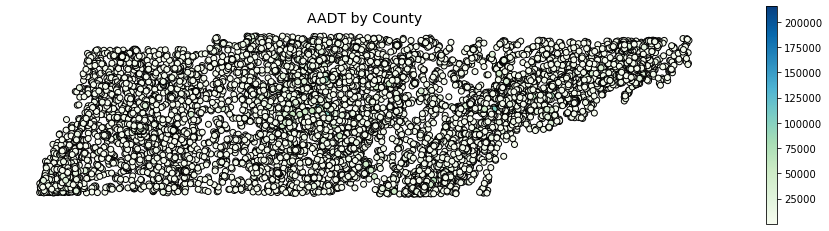

In [33]:
fig, ax = plt.subplots(figsize=(16,4))
tv_by_county.plot(column = 'AADT', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('AADT by County', fontsize = 14)
ax.axis('off');

In [34]:
traffic_volume_grouped = traffic_volume_county.groupby(['county']).agg({'tv_2018': "sum"}).reset_index()
traffic_volume_county.shape

(11176, 4)

In [35]:
tv_by_county

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude,geometry,index_right,county,lat,lng
0,1000005,CC,395.0,2019.0,36.126099,-84.416817,POINT (-84.41682 36.12610),82,Anderson,+36.1167307,-084.1954177
1,1000007,CC,1916.0,2019.0,36.191066,-84.181373,POINT (-84.18137 36.19107),82,Anderson,+36.1167307,-084.1954177
2,1000008,CC,3519.0,2019.0,36.218138,-84.162139,POINT (-84.16214 36.21814),82,Anderson,+36.1167307,-084.1954177
3,1000010,CC,2348.0,2019.0,36.228584,-84.155918,POINT (-84.15592 36.22858),82,Anderson,+36.1167307,-084.1954177
4,1000011,CC,8840.0,2019.0,36.214983,-84.152704,POINT (-84.15270 36.21498),82,Anderson,+36.1167307,-084.1954177
...,...,...,...,...,...,...,...,...,...,...,...
12398,95000233,CC,2201.0,2019.0,36.203666,-86.501840,POINT (-86.50184 36.20367),62,Wilson,+36.1495270,-086.2912423
12399,95000234,CC,14187.0,2019.0,36.163983,-86.512780,POINT (-86.51278 36.16398),62,Wilson,+36.1495270,-086.2912423
12400,95000235,CC,5116.0,2019.0,36.167042,-86.503559,POINT (-86.50356 36.16704),62,Wilson,+36.1495270,-086.2912423
12401,95000236,CC,4972.0,2019.0,36.231025,-86.491442,POINT (-86.49144 36.23103),62,Wilson,+36.1495270,-086.2912423


In [36]:
tv_by_county_grouped = tv_by_county[['AADT', 'county']]

In [37]:
tv_by_county_grouped.head()

,AADT,county
0,395.0,Anderson
1,1916.0,Anderson
2,3519.0,Anderson
3,2348.0,Anderson
4,8840.0,Anderson


In [38]:
tv_by_county.head()

,LocationID,Category,AADT,AADT_Year,Latitude,Longitude,geometry,index_right,county,lat,lng
0,1000005,CC,395.0,2019.0,36.126099,-84.416817,POINT (-84.41682 36.12610),82,Anderson,+36.1167307,-084.1954177
1,1000007,CC,1916.0,2019.0,36.191066,-84.181373,POINT (-84.18137 36.19107),82,Anderson,+36.1167307,-084.1954177
2,1000008,CC,3519.0,2019.0,36.218138,-84.162139,POINT (-84.16214 36.21814),82,Anderson,+36.1167307,-084.1954177
3,1000010,CC,2348.0,2019.0,36.228584,-84.155918,POINT (-84.15592 36.22858),82,Anderson,+36.1167307,-084.1954177
4,1000011,CC,8840.0,2019.0,36.214983,-84.152704,POINT (-84.15270 36.21498),82,Anderson,+36.1167307,-084.1954177


In [39]:
tv_by_county_grouped = tv_by_county_grouped.groupby(['county']).agg({'AADT': "sum"}).reset_index()
tv_by_county_grouped.shape

(95, 2)

In [40]:
tv_by_county_grouped.head()

,county,AADT
0,Anderson,963402.0
1,Bedford,504610.0
2,Benton,197834.0
3,Bledsoe,60342.0
4,Blount,1700190.0


In [41]:
tv_by_county_grouped = pd.merge(left = counties, right = tv_by_county_grouped, 
                    left_on = 'county', right_on = 'county',
                               how='inner')
tv_by_county_grouped.shape

(95, 5)

In [42]:
tv_by_county_grouped.head()

,county,lat,lng,geometry,AADT
0,Hamilton,+35.1634720,-085.2018432,"POLYGON ((-85.29255 35.26292, -85.29239 35.263...",7122425.0
1,Marion,+35.1334215,-085.6183990,"POLYGON ((-85.54388 35.30238, -85.54187 35.301...",545694.0
2,White,+35.9270486,-085.4557854,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ...",313990.0
3,Morgan,+36.1386970,-084.6392616,"POLYGON ((-84.79101 36.05854, -84.79185 36.059...",109150.0
4,Campbell,+36.4015922,-084.1592495,"POLYGON ((-84.32222 36.39287, -84.32249 36.393...",536910.0


In [43]:
tv_by_county_grouped = pd.merge(tv_by_county_grouped, county_pop,
                               left_on='county', right_on='county',
                               how='inner')
tv_by_county_grouped.shape

(95, 6)

In [44]:
tv_by_county_grouped.head()

,county,lat,lng,geometry,AADT,population
0,Hamilton,+35.1634720,-085.2018432,"POLYGON ((-85.29255 35.26292, -85.29239 35.263...",7122425.0,370594
1,Marion,+35.1334215,-085.6183990,"POLYGON ((-85.54388 35.30238, -85.54187 35.301...",545694.0,28889
2,White,+35.9270486,-085.4557854,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ...",313990.0,27833
3,Morgan,+36.1386970,-084.6392616,"POLYGON ((-84.79101 36.05854, -84.79185 36.059...",109150.0,21709
4,Campbell,+36.4015922,-084.1592495,"POLYGON ((-84.32222 36.39287, -84.32249 36.393...",536910.0,39497


In [45]:
tv_by_county_grouped['normalized_score'] = (tv_by_county_grouped['AADT']/tv_by_county_grouped['population'])
tv_by_county_grouped.head()

,county,lat,lng,geometry,AADT,population,normalized_score
0,Hamilton,+35.1634720,-085.2018432,"POLYGON ((-85.29255 35.26292, -85.29239 35.263...",7122425.0,370594,19.218943
1,Marion,+35.1334215,-085.6183990,"POLYGON ((-85.54388 35.30238, -85.54187 35.301...",545694.0,28889,18.889335
2,White,+35.9270486,-085.4557854,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ...",313990.0,27833,11.281213
3,Morgan,+36.1386970,-084.6392616,"POLYGON ((-84.79101 36.05854, -84.79185 36.059...",109150.0,21709,5.027869
4,Campbell,+36.4015922,-084.1592495,"POLYGON ((-84.32222 36.39287, -84.32249 36.393...",536910.0,39497,13.593691


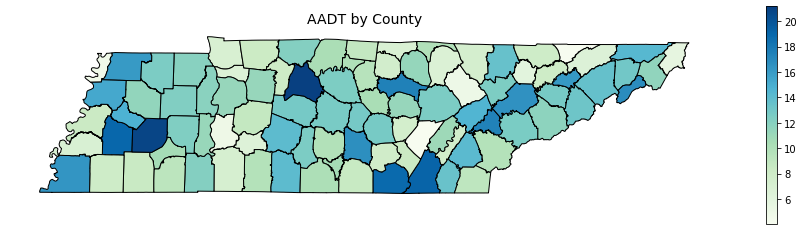

In [46]:
fig, ax = plt.subplots(figsize=(16,4))
tv_by_county_grouped.plot(column = 'normalized_score', #traffic volume divided by population
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('AADT by County', fontsize = 14)
ax.axis('off');

In [47]:
ipc_county = pd.merge(ipc_county, counties,
                     left_on='county', right_on='county',
                     how='inner')
ipc_county.shape

(95, 6)

In [48]:
ipc_county.head()

,year,county,income,lat,lng,geometry
0,2016,Anderson,39225.0,+36.1167307,-084.1954177,"POLYGON ((-84.32518 36.00504, -84.32528 36.005..."
1,2016,Bedford,34069.0,+35.5136604,-086.4582939,"POLYGON ((-86.63521 35.57742, -86.63569 35.577..."
2,2016,Benton,34013.0,+36.0709478,-088.0712321,"POLYGON ((-88.13691 36.20954, -88.13695 36.209..."
3,2016,Bledsoe,20353.0,+35.5935612,-085.2059104,"POLYGON ((-85.22651 35.76643, -85.22644 35.766..."
4,2016,Blount,39226.0,+35.6881849,-083.9229731,"POLYGON ((-84.14252 35.79696, -84.14158 35.797..."


In [49]:
pd.set_option('display.max_rows', 500)

In [50]:
ipc_county = gpd.GeoDataFrame(ipc_county)

In [51]:
mean = ipc_county['income'].mean()
print(mean)

35409.55789473684


In [52]:
std = ipc_county['income'].std()
print(std)

8094.852817864518


In [53]:
ipc_county['normalized_score'] = (ipc_county['income'] - mean)/std
ipc_county.head()

,year,county,income,lat,lng,geometry,normalized_score
0,2016,Anderson,39225.0,+36.1167307,-084.1954177,"POLYGON ((-84.32518 36.00504, -84.32528 36.005...",0.471342
1,2016,Bedford,34069.0,+35.5136604,-086.4582939,"POLYGON ((-86.63521 35.57742, -86.63569 35.577...",-0.165606
2,2016,Benton,34013.0,+36.0709478,-088.0712321,"POLYGON ((-88.13691 36.20954, -88.13695 36.209...",-0.172524
3,2016,Bledsoe,20353.0,+35.5935612,-085.2059104,"POLYGON ((-85.22651 35.76643, -85.22644 35.766...",-1.860016
4,2016,Blount,39226.0,+35.6881849,-083.9229731,"POLYGON ((-84.14252 35.79696, -84.14158 35.797...",0.471465


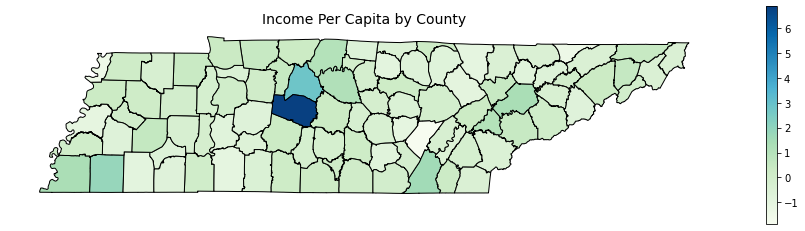

In [54]:
fig, ax = plt.subplots(figsize=(16,4))
ipc_county.plot(column = 'normalized_score', #zscore
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Income Per Capita by County', fontsize = 14)
ax.axis('off');

# Reading in Segmented Road Files - Excluding from Analysis

In [55]:
functional = gpd.read_file('../data/shapefile_segmented/Functional_Routes_Traffic_Segment_data.shp')
functional.head(5)
#Seems to be residential roads, will most likely exclude

,MSLINK,BLM,ELM,ID_NUMBER,NBR_TENN_C,NBR_RT2,RTE_NME,SPCL_CSE,CNTY_SEQ,YR_TRFC,...,VHCL_PASS_,VHCL_SU_TR,VHCL_MU_TR,STA_NBR,ACTL_CNT,CLASS_CNTY,CLASS_NB2,IS_CLASS_C,ID_NUMBE2,geometry
0,1.0,0.000,0.020,0101230001,ANDERSON,01230,SPRING ST.,0-NONE,1,2019,...,98.0,2.0,0.0,1 @,73,73,139C,NO,0101230001,"LINESTRING (2459162.749 627193.894, 2459230.70..."
1,2.0,0.000,1.373,0101264001,ANDERSON,01264,E. WOLF VALLEY RD.,0-NONE,1,2019,...,96.0,3.0,1.0,47,1,1,047C,YES,0101264001,"LINESTRING (2523126.922 634225.620, 2523945.59..."
2,3.0,1.373,2.535,0101264001,ANDERSON,01264,E. WOLF VALLEY RD.,0-NONE,1,2019,...,96.0,3.0,1.0,47,1,1,047C,YES,0101264001,"LINESTRING (2528322.800 639210.442, 2528411.28..."
3,4.0,2.535,2.600,0101264001,ANDERSON,01264,E. WOLF VALLEY RD.,0-NONE,1,2019,...,96.0,3.0,1.0,47,1,1,047C,YES,0101264001,"LINESTRING (2533069.696 643003.859, 2533354.36..."
4,5.0,2.600,8.430,0101264001,ANDERSON,01264,E. WOLF VALLEY RD.,0-NONE,1,2019,...,98.0,1.0,1.0,173,1,1,029C,NO,0101264001,"LINESTRING (2533354.366 643188.829, 2533718.33..."


In [56]:
functional.columns

Index(['MSLINK', 'BLM', 'ELM', 'ID_NUMBER', 'NBR_TENN_C', 'NBR_RT2', 'RTE_NME',
       'SPCL_CSE', 'CNTY_SEQ', 'YR_TRFC', 'AADT', 'DHV_PCT', 'PCT_PEAK_H',
       'DRCT_DISTR', 'VHCL_PASS_', 'VHCL_SU_TR', 'VHCL_MU_TR', 'STA_NBR',
       'ACTL_CNT', 'CLASS_CNTY', 'CLASS_NB2', 'IS_CLASS_C', 'ID_NUMBE2',
       'geometry'],
      dtype='object')

In [57]:
local = gpd.read_file('../data/shapefile_segmented/Local_Routes_Traffic_Segment_data.shp')
local.head(10)
#Seems to be residential roads, will most likely exclude

,MSLINK,BLM,ELM,ID_NUMBER,NBR_TENN_C,NBR_RT2,RTE_NME,SPCL_CSE,CNTY_SEQ,YR_TRFC,...,VHCL_PASS_,VHCL_SU_TR,VHCL_MU_TR,STA_NBR,ACTL_CNT,CLASS_CNTY,CLASS_NB2,IS_CLASS_C,ID_NUMBE2,geometry
0,1.0,0.000,0.510,010B158001,ANDERSON,0B158,WILTSHIRE DR.,0-NONE,1,2019,...,99.0,1.0,0.0,117,1,1.0,117C,YES,010B158001,"LINESTRING (2472747.922 609675.769, 2472464.37..."
1,2.0,0.000,2.001,010E527001,ANDERSON,0E527,BETHEL VALLEY RD.,0-NONE,1,2019,...,97.0,2.0,1.0,82,1,NaN,--,--,010E527001,"LINESTRING (2485819.069 599107.136, 2487439.11..."
2,3.0,0.000,0.280,010E528001,ANDERSON,0E528,E. DIVISION RD.,0-NONE,1,2019,...,97.0,2.0,1.0,182,1,NaN,--,--,010E528001,"LINESTRING (2488726.614 618735.429, 2488637.51..."
3,4.0,0.000,0.147,010E529001,ANDERSON,0E529,FLORIDA AVE.,0-NONE,1,2019,...,97.0,2.0,1.0,189,1,NaN,--,--,010E529001,"LINESTRING (2491873.609 622625.348, 2491720.06..."
4,5.0,0.000,0.286,020A681001,BEDFORD,0A681,MORTON ST.,0-NONE,1,2019,...,0.0,0.0,0.0,27,2,NaN,--,--,020A681001,"LINESTRING (1829980.941 423772.391, 1829982.27..."
5,6.0,0.286,0.367,020A681001,BEDFORD,0A681,NASHVILLE DIRT RD.,0-NONE,1,2019,...,0.0,0.0,0.0,27,2,NaN,--,--,020A681001,"LINESTRING (1829841.752 425236.332, 1829788.70..."
6,7.0,0.367,3.056,020A681001,BEDFORD,0A681,NASHVILLE DIRT RD.,0-NONE,1,2019,...,0.0,0.0,0.0,27,2,NaN,--,--,020A681001,"LINESTRING (1829741.581 425578.241, 1829596.66..."
7,8.0,3.056,5.590,020A681001,BEDFORD,0A681,NASHVILLE DIRT RD.,0-NONE,1,2019,...,0.0,0.0,0.0,27,2,NaN,--,--,020A681001,"LINESTRING (1825775.422 438504.698, 1824584.21..."
8,9.0,0.000,0.109,020A811001,BEDFORD,0A811,W. HOLLAND ST.,0-NONE,1,2019,...,91.0,4.0,5.0,133,2,NaN,--,--,020A811001,"LINESTRING (1831249.823 419011.094, 1831116.09..."
9,10.0,0.000,0.264,050A470001,BLOUNT,0A470,CHELTENHAM RD.,0-NONE,1,2019,...,98.0,1.0,1.0,152,5,5.0,129C,NO,050A470001,"LINESTRING (2577107.139 530142.799, 2577187.38..."


In [58]:
state = gpd.read_file('../data/shapefile_segmented/State_Route_Traffic_Segment_data.shp')
state.head()

,MSLINK,BLM,ELM,ID_NUMBER,NBR_TENN_C,NBR_RT2,RTE_NME,SPCL_CSE,CNTY_SEQ,YR_TRFC,...,VHCL_PASS_,VHCL_SU_TR,VHCL_MU_TR,STA_NBR,ACTL_CNT,CLASS_CNTY,CLASS_NB2,IS_CLASS_C,ID_NUMBE2,geometry
0,1.0,0.000,0.527,01SR009001,ANDERSON,SR009,MAIN ST.,0-NONE,1,2019,...,98.0,1.0,1.0,111,1,1,036C,--,01SR009001,"LINESTRING (2511000.011 696791.700, 2511027.89..."
1,2.0,0.527,0.930,01SR009001,ANDERSON,SR009,MAIN ST.,0-NONE,1,2019,...,98.0,1.0,1.0,111,1,1,036C,--,01SR009001,"LINESTRING (2512072.841 694271.147, 2512190.30..."
2,3.0,0.930,1.700,01SR009001,ANDERSON,SR009,S. MAIN ST.,0-NONE,1,2019,...,98.0,1.0,1.0,11,1,1,036C,--,01SR009001,"LINESTRING (2512096.730 692266.463, 2512258.42..."
3,4.0,1.700,1.951,01SR009001,ANDERSON,SR009,S. MAIN ST.,0-NONE,1,2019,...,98.0,1.0,1.0,14,1,1,036C,--,01SR009001,"LINESTRING (2514116.200 688770.187, 2514288.31..."
4,5.0,1.951,4.779,01SR009001,ANDERSON,SR009,US-HWY. 25W,0-NONE,1,2019,...,98.0,1.0,1.0,14,1,1,036C,--,01SR009001,"LINESTRING (2514918.696 687698.875, 2515350.01..."


# Creating Map for Davidson County Car Wash Locations

In [59]:
car_wash_davidson = pd.read_csv('../data/davidson_car_washes_final.csv')
car_wash_davidson.head()

,company,lat,lng
0,Shur Brite Hi Speed Car Wash,36.152997,-86.795001
1,Mister Car Wash,35.987642,-86.545082
2,White Bridge Auto Wash,36.138586,-86.857295
3,Aqua Jet Carwash,36.189158,-86.410532
4,D & T Truck Wash & Repair,36.016063,-86.616702


In [60]:
car_wash_davidson['geometry'] = car_wash_davidson.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
car_wash_davidson.head()

,company,lat,lng,geometry
0,Shur Brite Hi Speed Car Wash,36.152997,-86.795001,POINT (-86.7950014 36.1529966)
1,Mister Car Wash,35.987642,-86.545082,POINT (-86.54508199999999 35.9876422)
2,White Bridge Auto Wash,36.138586,-86.857295,POINT (-86.85729479999999 36.1385861)
3,Aqua Jet Carwash,36.189158,-86.410532,POINT (-86.41053220000001 36.18915820000001)
4,D & T Truck Wash & Repair,36.016063,-86.616702,POINT (-86.61670190000001 36.0160626)


In [61]:
#car_wash_davidson.to_csv('../data/davidson_q4.csv', index=False)

In [62]:
car_wash_davidson_geo = gpd.GeoDataFrame(car_wash_davidson, 
                           crs = counties.crs, 
                           geometry = car_wash_davidson['geometry'])
type(car_wash_davidson_geo)

geopandas.geodataframe.GeoDataFrame

In [63]:
car_wash_in_davidson = gpd.sjoin(car_wash_davidson_geo, counties, op = 'within')
car_wash_in_davidson.head()

,company,lat_left,lng_left,geometry,index_right,county,lat_right,lng_right
0,Shur Brite Hi Speed Car Wash,36.152997,-86.795001,POINT (-86.79500 36.15300),68,Davidson,+36.1691287,-086.7847898
2,White Bridge Auto Wash,36.138586,-86.857295,POINT (-86.85729 36.13859),68,Davidson,+36.1691287,-086.7847898
4,D & T Truck Wash & Repair,36.016063,-86.616702,POINT (-86.61670 36.01606),68,Davidson,+36.1691287,-086.7847898
5,Camel Express Car Wash,36.243118,-86.757530,POINT (-86.75753 36.24312),68,Davidson,+36.1691287,-086.7847898
7,Mister Car Wash,36.202449,-86.739377,POINT (-86.73938 36.20245),68,Davidson,+36.1691287,-086.7847898


In [64]:
car_wash_in_davidson = car_wash_in_davidson[['county', 'company', 'lat_left', 'lng_left', 'geometry']]
car_wash_in_davidson.columns = ['county', 'company', 'lat', 'lng', 'geometry']
car_wash_in_davidson.head()

,county,company,lat,lng,geometry
0,Davidson,Shur Brite Hi Speed Car Wash,36.152997,-86.795001,POINT (-86.79500 36.15300)
2,Davidson,White Bridge Auto Wash,36.138586,-86.857295,POINT (-86.85729 36.13859)
4,Davidson,D & T Truck Wash & Repair,36.016063,-86.616702,POINT (-86.61670 36.01606)
5,Davidson,Camel Express Car Wash,36.243118,-86.757530,POINT (-86.75753 36.24312)
7,Davidson,Mister Car Wash,36.202449,-86.739377,POINT (-86.73938 36.20245)


In [65]:
car_wash_in_davidson['county'].value_counts()

Davidson      17
Williamson     5
Rutherford     4
Wilson         4
Montgomery     3
Sumner         2
Robertson      2
Maury          1
Name: county, dtype: int64

In [66]:
car_wash_in_davidson = car_wash_in_davidson.loc[car_wash_in_davidson['county'].isin(["Davidson"])]
car_wash_in_davidson.shape

(17, 5)

In [67]:
davidson_polygon = counties.loc[counties['county'] == 'Davidson']
davidson_polygon.shape

(1, 4)

In [68]:
davidson_polygon.geometry.centroid

<ipython-input-68-70a83b8e7ffa>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  davidson_polygon.geometry.centroid


68    POINT (-86.78483 36.16954)
dtype: geometry

In [69]:
davidson_center = davidson_polygon.geometry.centroid[68]
print(davidson_center)

POINT (-86.78482913294744 36.16953640509519)


<ipython-input-69-c8227d2653d0>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  davidson_center = davidson_polygon.geometry.centroid[68]


In [70]:
davidson_area_center = [davidson_center.y, davidson_center.x]
print(davidson_area_center)

[36.16953640509519, -86.78482913294744]


In [71]:
davidson_map = folium.Map(location =  davidson_area_center, zoom_start = 12)

folium.GeoJson(davidson_polygon).add_to(davidson_map)
for row_index, row_values in car_wash_in_davidson.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['company'])
    icon=folium.Icon(color="blue",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(davidson_map)
davidson_map

# Creating a Map for Williamson County Car Wash Locations

In [72]:
williamson_polygon = counties.loc[counties['county'] == 'Williamson']
williamson_polygon.shape

(1, 4)

<AxesSubplot:>

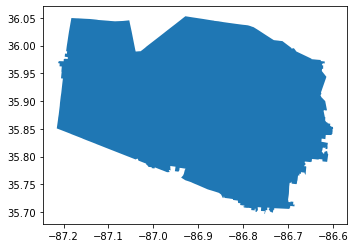

In [73]:
williamson_polygon.plot()

# Creating Map for Williamson County Car Wash Locations

In [74]:
car_wash_williamson = pd.read_csv('../data/williamson_car_washes_final.csv')
car_wash_williamson.head()

,company,lat,lng
0,Shur Brite Hi Speed Car Wash,36.152997,-86.795001
1,Mister Car Wash,35.987642,-86.545082
2,White Bridge Auto Wash,36.138586,-86.857295
3,Mobile Detail Solution,35.743734,-86.881184
4,Details To Go,35.908850,-86.874965


In [75]:
car_wash_williamson['geometry'] = car_wash_williamson.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
car_wash_williamson.head()

,company,lat,lng,geometry
0,Shur Brite Hi Speed Car Wash,36.152997,-86.795001,POINT (-86.7950014 36.1529966)
1,Mister Car Wash,35.987642,-86.545082,POINT (-86.54508199999999 35.9876422)
2,White Bridge Auto Wash,36.138586,-86.857295,POINT (-86.85729479999999 36.1385861)
3,Mobile Detail Solution,35.743734,-86.881184,POINT (-86.88118440000001 35.7437341)
4,Details To Go,35.908850,-86.874965,POINT (-86.87496540000001 35.9088498)


In [76]:
#car_wash_williamson.to_csv('../data/williamson_right.csv', index=False)

In [77]:
car_wash_williamson_geo = gpd.GeoDataFrame(car_wash_williamson, 
                           crs = counties.crs, 
                           geometry = car_wash_williamson['geometry'])
type(car_wash_davidson_geo)

geopandas.geodataframe.GeoDataFrame

In [78]:
car_wash_in_williamson = gpd.sjoin(car_wash_williamson_geo, counties, op = 'within')
car_wash_in_williamson.head()

,company,lat_left,lng_left,geometry,index_right,county,lat_right,lng_right
0,Shur Brite Hi Speed Car Wash,36.152997,-86.795001,POINT (-86.79500 36.15300),68,Davidson,+36.1691287,-086.7847898
2,White Bridge Auto Wash,36.138586,-86.857295,POINT (-86.85729 36.13859),68,Davidson,+36.1691287,-086.7847898
8,Champion Car Wash,36.074533,-86.923878,POINT (-86.92388 36.07453),68,Davidson,+36.1691287,-086.7847898
9,"Clean Way Detail- Nolensville, Franklin, Brent...",36.033018,-86.714973,POINT (-86.71497 36.03302),68,Davidson,+36.1691287,-086.7847898
10,Premier Mobile Detailing,36.077543,-86.731578,POINT (-86.73158 36.07754),68,Davidson,+36.1691287,-086.7847898


In [79]:
car_wash_in_williamson = car_wash_in_williamson[['county', 'company', 'lat_left', 'lng_left', 'geometry']]
car_wash_in_williamson.columns = ['county', 'company', 'lat', 'lng', 'geometry']
car_wash_in_williamson.head()

,county,company,lat,lng,geometry
0,Davidson,Shur Brite Hi Speed Car Wash,36.152997,-86.795001,POINT (-86.79500 36.15300)
2,Davidson,White Bridge Auto Wash,36.138586,-86.857295,POINT (-86.85729 36.13859)
8,Davidson,Champion Car Wash,36.074533,-86.923878,POINT (-86.92388 36.07453)
9,Davidson,"Clean Way Detail- Nolensville, Franklin, Brent...",36.033018,-86.714973,POINT (-86.71497 36.03302)
10,Davidson,Premier Mobile Detailing,36.077543,-86.731578,POINT (-86.73158 36.07754)


In [80]:
car_wash_in_williamson['county'].value_counts()

Davidson      18
Williamson     9
Maury          6
Rutherford     5
Wilson         4
Name: county, dtype: int64

In [81]:
car_wash_in_williamson = car_wash_in_williamson.loc[car_wash_in_williamson['county'].isin(["Williamson"])]
car_wash_in_williamson.shape

(9, 5)

In [83]:
williamson_polygon = counties.loc[counties['county'] == 'Williamson']
williamson_polygon.shape

(1, 4)

In [84]:
williamson_polygon.geometry.centroid

<ipython-input-84-89b8247e2db6>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  williamson_polygon.geometry.centroid


51    POINT (-86.89866 35.89384)
dtype: geometry

In [85]:
williamson_center = williamson_polygon.geometry.centroid[51]
print(williamson_center)

POINT (-86.89865861086247 35.89384493260172)


<ipython-input-85-198170076137>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  williamson_center = williamson_polygon.geometry.centroid[51]


In [86]:
williamson_area_center = [williamson_center.y, williamson_center.x]
print(williamson_area_center)

[35.89384493260172, -86.89865861086247]


In [87]:
williamson_map = folium.Map(location =  williamson_area_center, zoom_start = 12)

folium.GeoJson(williamson_polygon).add_to(williamson_map)
for row_index, row_values in car_wash_in_williamson.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['company'])
    icon=folium.Icon(color="blue",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(williamson_map)
williamson_map

# Madison Car Wash Locations

In [88]:
madison_polygon = counties.loc[counties['county'] == 'Madison']
madison_polygon.shape

(1, 4)

<AxesSubplot:>

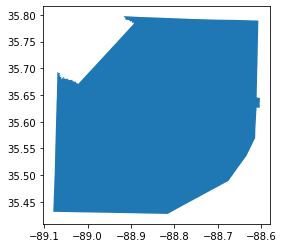

In [90]:
madison_polygon.plot()

In [91]:
madison_polygon.geometry.centroid

<ipython-input-91-36d7e3de28bc>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  madison_polygon.geometry.centroid


86    POINT (-88.83848 35.60815)
dtype: geometry

In [92]:
madison_center = madison_polygon.geometry.centroid[86]
print(madison_center)

POINT (-88.83847643223862 35.60815033246329)


<ipython-input-92-c2ca8f238b22>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  madison_center = madison_polygon.geometry.centroid[86]


In [93]:
madison_area_center = [madison_center.y, madison_center.x]
print(madison_area_center)

[35.60815033246329, -88.83847643223862]


In [94]:
car_wash_madison = pd.read_csv('../data/madison_cw.csv')
car_wash_madison.head()

,company,lat,lng
0,Auto Clean Express,35.568530,-88.815035
1,Car Wash USA Express - North Highland,35.681439,-88.830782
2,Morton's Trailer Washout,35.592003,-89.054672
3,Daddy Don's Hand Car Wash,35.620435,-88.833325
4,T & J Mobile,35.607875,-88.813445


In [95]:
car_wash_madison['geometry'] = car_wash_madison.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
car_wash_madison.head()

,company,lat,lng,geometry
0,Auto Clean Express,35.568530,-88.815035,POINT (-88.81503529999998 35.56852970000001)
1,Car Wash USA Express - North Highland,35.681439,-88.830782,POINT (-88.83078190000001 35.6814387)
2,Morton's Trailer Washout,35.592003,-89.054672,POINT (-89.05467220000001 35.5920028)
3,Daddy Don's Hand Car Wash,35.620435,-88.833325,POINT (-88.8333251 35.620435)
4,T & J Mobile,35.607875,-88.813445,POINT (-88.813445 35.60787499999999)


In [96]:
car_wash_madison_geo = gpd.GeoDataFrame(car_wash_madison, 
                           crs = counties.crs, 
                           geometry = car_wash_madison['geometry'])
type(car_wash_madison_geo)

geopandas.geodataframe.GeoDataFrame

In [97]:
car_wash_in_madison = gpd.sjoin(car_wash_madison_geo, counties, op = 'within')
car_wash_in_madison.head()

,company,lat_left,lng_left,geometry,index_right,county,lat_right,lng_right
0,Auto Clean Express,35.568530,-88.815035,POINT (-88.81504 35.56853),86,Madison,+35.6060563,-088.8334238
1,Car Wash USA Express - North Highland,35.681439,-88.830782,POINT (-88.83078 35.68144),86,Madison,+35.6060563,-088.8334238
2,Morton's Trailer Washout,35.592003,-89.054672,POINT (-89.05467 35.59200),86,Madison,+35.6060563,-088.8334238
3,Daddy Don's Hand Car Wash,35.620435,-88.833325,POINT (-88.83333 35.62044),86,Madison,+35.6060563,-088.8334238
4,T & J Mobile,35.607875,-88.813445,POINT (-88.81345 35.60787),86,Madison,+35.6060563,-088.8334238


In [98]:
car_wash_in_madison = car_wash_in_madison[['county', 'company', 'lat_left', 'lng_left', 'geometry']]
car_wash_in_madison.columns = ['county', 'company', 'lat', 'lng', 'geometry']
car_wash_in_madison.head()

,county,company,lat,lng,geometry
0,Madison,Auto Clean Express,35.568530,-88.815035,POINT (-88.81504 35.56853)
1,Madison,Car Wash USA Express - North Highland,35.681439,-88.830782,POINT (-88.83078 35.68144)
2,Madison,Morton's Trailer Washout,35.592003,-89.054672,POINT (-89.05467 35.59200)
3,Madison,Daddy Don's Hand Car Wash,35.620435,-88.833325,POINT (-88.83333 35.62044)
4,Madison,T & J Mobile,35.607875,-88.813445,POINT (-88.81345 35.60787)


In [99]:
car_wash_in_madison['county'].value_counts()

Madison      16
Gibson        7
Henderson     4
Chester       3
Crockett      2
Hardeman      1
Haywood       1
Name: county, dtype: int64

In [100]:
car_wash_in_madison = car_wash_in_madison.loc[car_wash_in_madison['county'].isin(["Madison"])]
car_wash_in_madison.shape

(16, 5)

In [101]:
madison_map = folium.Map(location =  madison_area_center, zoom_start = 12)

folium.GeoJson(madison_polygon).add_to(madison_map)
for row_index, row_values in car_wash_in_madison.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['company'])
    icon=folium.Icon(color="blue",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(madison_map)
madison_map

# Hamilton Car Wash Locations

In [103]:
hamilton_polygon = counties.loc[counties['county'] == 'Hamilton']
hamilton_polygon.shape

(1, 4)

<AxesSubplot:>

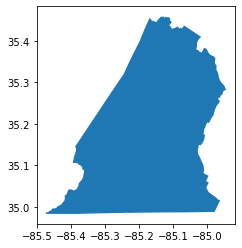

In [104]:
hamilton_polygon.plot()

In [105]:
hamilton_polygon.geometry.centroid

<ipython-input-105-ba4022007433>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hamilton_polygon.geometry.centroid


0    POINT (-85.16476 35.18088)
dtype: geometry

In [106]:
hamilton_center = hamilton_polygon.geometry.centroid[0]
print(hamilton_center)

POINT (-85.16476180484005 35.18088184307678)


<ipython-input-106-63fb14a532f7>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hamilton_center = hamilton_polygon.geometry.centroid[0]


In [107]:
hamilton_area_center = [hamilton_center.y, hamilton_center.x]
print(hamilton_area_center)

[35.180881843076776, -85.16476180484005]


In [108]:
car_wash_hamilton = pd.read_csv('../data/hamilton_cw.csv')
car_wash_hamilton.head()

,company,lat,lng
0,Zips Car Wash,35.079930,-85.068389
1,Highland Hand Carwash & Detail,35.108091,-85.271383
2,Plaza Car Wash,35.113515,-85.256235
3,Super Wash,35.121329,-85.125578
4,Superior Hand Car Wash,35.043705,-85.220293


In [109]:
car_wash_hamilton['geometry'] = car_wash_hamilton.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
car_wash_hamilton.head()

,company,lat,lng,geometry
0,Zips Car Wash,35.079930,-85.068389,POINT (-85.06838909999998 35.0799299)
1,Highland Hand Carwash & Detail,35.108091,-85.271383,POINT (-85.27138269999998 35.10809119999999)
2,Plaza Car Wash,35.113515,-85.256235,POINT (-85.2562353 35.11351520000001)
3,Super Wash,35.121329,-85.125578,POINT (-85.12557779999999 35.121329)
4,Superior Hand Car Wash,35.043705,-85.220293,POINT (-85.2202928 35.04370480000001)


In [110]:
car_wash_hamilton_geo = gpd.GeoDataFrame(car_wash_hamilton, 
                           crs = counties.crs, 
                           geometry = car_wash_hamilton['geometry'])
type(car_wash_hamilton_geo)

geopandas.geodataframe.GeoDataFrame

In [111]:
car_wash_in_hamilton = gpd.sjoin(car_wash_hamilton_geo, counties, op = 'within')
car_wash_in_hamilton.head()

,company,lat_left,lng_left,geometry,index_right,county,lat_right,lng_right
0,Zips Car Wash,35.079930,-85.068389,POINT (-85.06839 35.07993),0,Hamilton,+35.1634720,-085.2018432
1,Highland Hand Carwash & Detail,35.108091,-85.271383,POINT (-85.27138 35.10809),0,Hamilton,+35.1634720,-085.2018432
2,Plaza Car Wash,35.113515,-85.256235,POINT (-85.25624 35.11352),0,Hamilton,+35.1634720,-085.2018432
3,Super Wash,35.121329,-85.125578,POINT (-85.12558 35.12133),0,Hamilton,+35.1634720,-085.2018432
4,Superior Hand Car Wash,35.043705,-85.220293,POINT (-85.22029 35.04370),0,Hamilton,+35.1634720,-085.2018432


In [112]:
car_wash_in_hamilton = car_wash_in_hamilton[['county', 'company', 'lat_left', 'lng_left', 'geometry']]
car_wash_in_hamilton.columns = ['county', 'company', 'lat', 'lng', 'geometry']
car_wash_in_hamilton.head()

,county,company,lat,lng,geometry
0,Hamilton,Zips Car Wash,35.079930,-85.068389,POINT (-85.06839 35.07993)
1,Hamilton,Highland Hand Carwash & Detail,35.108091,-85.271383,POINT (-85.27138 35.10809)
2,Hamilton,Plaza Car Wash,35.113515,-85.256235,POINT (-85.25624 35.11352)
3,Hamilton,Super Wash,35.121329,-85.125578,POINT (-85.12558 35.12133)
4,Hamilton,Superior Hand Car Wash,35.043705,-85.220293,POINT (-85.22029 35.04370)


In [113]:
car_wash_in_hamilton['county'].value_counts()

Hamilton    44
Bradley      3
Rhea         1
Name: county, dtype: int64

In [114]:
car_wash_in_hamilton = car_wash_in_hamilton.loc[car_wash_in_hamilton['county'].isin(["Hamilton"])]
car_wash_in_hamilton.shape

(44, 5)

In [115]:
hamilton_map = folium.Map(location =  hamilton_area_center, zoom_start = 12)

folium.GeoJson(hamilton_polygon).add_to(hamilton_map)
for row_index, row_values in car_wash_in_hamilton.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['company'])
    icon=folium.Icon(color="blue",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(hamilton_map)
hamilton_map

# Creating Map for Shelby County Car Wash Locations

In [116]:
shelby_polygon = counties.loc[counties['county'] == 'Shelby']
shelby_polygon.shape

(1, 4)

<AxesSubplot:>

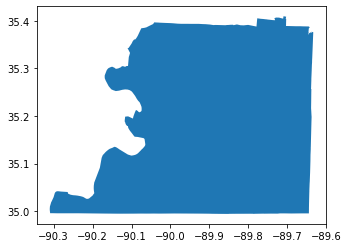

In [117]:
shelby_polygon.plot()

In [118]:
shelby_polygon.geometry.centroid

<ipython-input-118-2e00f32527f3>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shelby_polygon.geometry.centroid


65    POINT (-89.89560 35.18400)
dtype: geometry

In [119]:
shelby_center = shelby_polygon.geometry.centroid[65]
print(shelby_center)

POINT (-89.89560146124404 35.18400117613554)


<ipython-input-119-7d95eb17ae4b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shelby_center = shelby_polygon.geometry.centroid[65]


In [120]:
shelby_area_center = [shelby_center.y, shelby_center.x]
print(shelby_area_center)

[35.18400117613554, -89.89560146124404]


In [121]:
car_wash_shelby = pd.read_csv('../data/shelby_cw.csv')
car_wash_shelby.head()

,company,lat,lng
0,Word of Mouth Detailing,35.203678,-89.810225
1,Car Wash USA Express - Perkins,35.073754,-89.905548
2,Car Genie Mobile Car Wash and Detail,35.070093,-89.776980
3,Car Wash USA Express - Riverdale,35.046098,-89.829959
4,Car Genie Mobile CarWash and Detail,34.962462,-89.918709


In [122]:
car_wash_shelby['geometry'] = car_wash_shelby.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
car_wash_shelby.head()

,company,lat,lng,geometry
0,Word of Mouth Detailing,35.203678,-89.810225,POINT (-89.81022500000002 35.2036778)
1,Car Wash USA Express - Perkins,35.073754,-89.905548,POINT (-89.90554759999998 35.0737536)
2,Car Genie Mobile Car Wash and Detail,35.070093,-89.776980,POINT (-89.77697959999998 35.0700928)
3,Car Wash USA Express - Riverdale,35.046098,-89.829959,POINT (-89.82995869999998 35.0460981)
4,Car Genie Mobile CarWash and Detail,34.962462,-89.918709,POINT (-89.91870879999998 34.96246199999999)


In [123]:
car_wash_shelby_geo = gpd.GeoDataFrame(car_wash_shelby, 
                           crs = counties.crs, 
                           geometry = car_wash_shelby['geometry'])
type(car_wash_shelby_geo)

geopandas.geodataframe.GeoDataFrame

In [124]:
car_wash_in_shelby = gpd.sjoin(car_wash_shelby_geo, counties, op = 'within')
car_wash_in_shelby.head()

,company,lat_left,lng_left,geometry,index_right,county,lat_right,lng_right
0,Word of Mouth Detailing,35.203678,-89.810225,POINT (-89.81023 35.20368),65,Shelby,+35.1837942,-089.8953970
1,Car Wash USA Express - Perkins,35.073754,-89.905548,POINT (-89.90555 35.07375),65,Shelby,+35.1837942,-089.8953970
2,Car Genie Mobile Car Wash and Detail,35.070093,-89.776980,POINT (-89.77698 35.07009),65,Shelby,+35.1837942,-089.8953970
3,Car Wash USA Express - Riverdale,35.046098,-89.829959,POINT (-89.82996 35.04610),65,Shelby,+35.1837942,-089.8953970
6,Zips Car Wash,35.114107,-89.900760,POINT (-89.90076 35.11411),65,Shelby,+35.1837942,-089.8953970


In [125]:
car_wash_in_shelby = car_wash_in_shelby[['county', 'company', 'lat_left', 'lng_left', 'geometry']]
car_wash_in_shelby.columns = ['county', 'company', 'lat', 'lng', 'geometry']
car_wash_in_shelby.head()

,county,company,lat,lng,geometry
0,Shelby,Word of Mouth Detailing,35.203678,-89.810225,POINT (-89.81023 35.20368)
1,Shelby,Car Wash USA Express - Perkins,35.073754,-89.905548,POINT (-89.90555 35.07375)
2,Shelby,Car Genie Mobile Car Wash and Detail,35.070093,-89.776980,POINT (-89.77698 35.07009)
3,Shelby,Car Wash USA Express - Riverdale,35.046098,-89.829959,POINT (-89.82996 35.04610)
6,Shelby,Zips Car Wash,35.114107,-89.900760,POINT (-89.90076 35.11411)


In [126]:
car_wash_in_shelby['county'].value_counts()

Shelby    16
Name: county, dtype: int64

In [127]:
car_wash_in_shelby = car_wash_in_shelby.loc[car_wash_in_shelby['county'].isin(["Shelby"])]
car_wash_in_shelby.shape

(16, 5)

In [129]:
shelby_map = folium.Map(location =  shelby_area_center, zoom_start = 12)

folium.GeoJson(shelby_polygon).add_to(shelby_map)
for row_index, row_values in car_wash_in_shelby.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['company'])
    icon=folium.Icon(color="blue",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(shelby_map)
shelby_map

# Creating Map for Knox County Car Wash Locations

In [130]:
knox_polygon = counties.loc[counties['county'] == 'Knox']
knox_polygon.shape

(1, 4)

<AxesSubplot:>

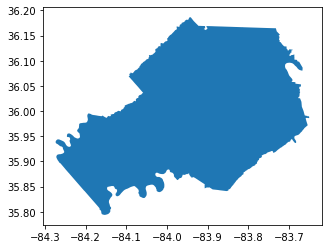

In [131]:
knox_polygon.plot()

In [132]:
knox_polygon.geometry.centroid

<ipython-input-132-c33581f0327f>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  knox_polygon.geometry.centroid


53    POINT (-83.93709 35.99321)
dtype: geometry

In [133]:
knox_center = knox_polygon.geometry.centroid[53]
print(knox_center)

POINT (-83.93709453229779 35.9932133026458)


<ipython-input-133-87b274803a6c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  knox_center = knox_polygon.geometry.centroid[53]


In [134]:
knox_area_center = [knox_center.y, knox_center.x]
print(knox_area_center)

[35.9932133026458, -83.93709453229779]


In [135]:
car_wash_knox = pd.read_csv('../data/knox_cw.csv')
car_wash_knox.head()

,company,lat,lng
0,PureMagic Carwash - Alcoa,35.829497,-83.975229
1,American Self Storage & Car Wash,35.849035,-83.985951
2,Broadway Car Wash,36.046645,-83.928137
3,Superior Car Wash,35.759369,-83.878494
4,Zips Car Wash,35.764345,-83.972174


In [136]:
car_wash_knox['geometry'] = car_wash_knox.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
car_wash_knox.head()

,company,lat,lng,geometry
0,PureMagic Carwash - Alcoa,35.829497,-83.975229,POINT (-83.9752287 35.8294974)
1,American Self Storage & Car Wash,35.849035,-83.985951,POINT (-83.985951 35.849035)
2,Broadway Car Wash,36.046645,-83.928137,POINT (-83.92813699999998 36.046645)
3,Superior Car Wash,35.759369,-83.878494,POINT (-83.87849419999998 35.7593688)
4,Zips Car Wash,35.764345,-83.972174,POINT (-83.97217409999998 35.76434549999999)


In [137]:
car_wash_knox_geo = gpd.GeoDataFrame(car_wash_knox, 
                           crs = counties.crs, 
                           geometry = car_wash_knox['geometry'])
type(car_wash_knox_geo)

geopandas.geodataframe.GeoDataFrame

In [138]:
car_wash_in_knox = gpd.sjoin(car_wash_knox_geo, counties, op = 'within')
car_wash_in_knox.head()

,company,lat_left,lng_left,geometry,index_right,county,lat_right,lng_right
0,PureMagic Carwash - Alcoa,35.829497,-83.975229,POINT (-83.97523 35.82950),25,Blount,+35.6881849,-083.9229731
1,American Self Storage & Car Wash,35.849035,-83.985951,POINT (-83.98595 35.84904),25,Blount,+35.6881849,-083.9229731
3,Superior Car Wash,35.759369,-83.878494,POINT (-83.87849 35.75937),25,Blount,+35.6881849,-083.9229731
4,Zips Car Wash,35.764345,-83.972174,POINT (-83.97217 35.76435),25,Blount,+35.6881849,-083.9229731
23,Car Care,35.751631,-83.976027,POINT (-83.97603 35.75163),25,Blount,+35.6881849,-083.9229731


In [139]:
car_wash_in_knox = car_wash_in_knox[['county', 'company', 'lat_left', 'lng_left', 'geometry']]
car_wash_in_knox.columns = ['county', 'company', 'lat', 'lng', 'geometry']
car_wash_in_knox.head()

,county,company,lat,lng,geometry
0,Blount,PureMagic Carwash - Alcoa,35.829497,-83.975229,POINT (-83.97523 35.82950)
1,Blount,American Self Storage & Car Wash,35.849035,-83.985951,POINT (-83.98595 35.84904)
3,Blount,Superior Car Wash,35.759369,-83.878494,POINT (-83.87849 35.75937)
4,Blount,Zips Car Wash,35.764345,-83.972174,POINT (-83.97217 35.76435)
23,Blount,Car Care,35.751631,-83.976027,POINT (-83.97603 35.75163)


In [140]:
car_wash_in_knox['county'].value_counts()

Knox         24
Blount        7
Sevier        2
Jefferson     1
Anderson      1
Name: county, dtype: int64

In [141]:
car_wash_in_knox = car_wash_in_knox.loc[car_wash_in_knox['county'].isin(["Knox"])]
car_wash_in_knox.shape

(24, 5)

In [142]:
knox_map = folium.Map(location =  knox_area_center, zoom_start = 12)

folium.GeoJson(knox_polygon).add_to(knox_map)
for row_index, row_values in car_wash_in_knox.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['company'])
    icon=folium.Icon(color="blue",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(knox_map)
knox_map

In [144]:
state.columns

Index(['MSLINK', 'BLM', 'ELM', 'ID_NUMBER', 'NBR_TENN_C', 'NBR_RT2', 'RTE_NME',
       'SPCL_CSE', 'CNTY_SEQ', 'YR_TRFC', 'AADT', 'DHV_PCT', 'PCT_PEAK_H',
       'DRCT_DISTR', 'VHCL_PASS_', 'VHCL_SU_TR', 'VHCL_MU_TR', 'STA_NBR',
       'ACTL_CNT', 'CLASS_CNTY', 'CLASS_NB2', 'IS_CLASS_C', 'ID_NUMBE2',
       'geometry'],
      dtype='object')

In [146]:
state = state[['NBR_TENN_C', 'RTE_NME', 'AADT', 'geometry']]
state.columns = ['county', 'road_name', 'AADT', 'geometry']
state.head()

,county,road_name,AADT,geometry
0,ANDERSON,MAIN ST.,11400,"LINESTRING (2511000.011 696791.700, 2511027.89..."
1,ANDERSON,MAIN ST.,11400,"LINESTRING (2512072.841 694271.147, 2512190.30..."
2,ANDERSON,S. MAIN ST.,8840,"LINESTRING (2512096.730 692266.463, 2512258.42..."
3,ANDERSON,S. MAIN ST.,6620,"LINESTRING (2514116.200 688770.187, 2514288.31..."
4,ANDERSON,US-HWY. 25W,6620,"LINESTRING (2514918.696 687698.875, 2515350.01..."


In [147]:
state_road_shelby = state.loc[state['county'].isin(["SHELBY"])]
state_road_shelby.shape

(380, 4)

In [149]:
shelby_tv_map = folium.Map(location =  shelby_area_center, zoom_start = 12)

folium.GeoJson(shelby_polygon).add_to(shelby_tv_map)
for row_index, row_values in state_road_shelby.iterrows():
    loc = [row_values['geometry']
    pop = str(row_values['AADT'])
    icon=folium.Icon(color="blue",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(shelby_tv_map)
shelby_tv_map

SyntaxError: invalid syntax (<ipython-input-149-5e1ffd71171c>, line 6)